<a href="https://colab.research.google.com/github/ucfilho/Metodos_Numericos/blob/master/Difusao_Crank_Nicolson_ago_15_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt


# size of the grids
MX = 16
nT = 201

# spatial coordinate

X = np.linspace(0,1,MX)
h = X[1]-X[0]

#temporal coordinate
t0, tmax = 0.0, 50.0
T = np.linspace(t0,tmax,nT)
dT = T[1]-T[0]

# diffusion coefficient
D = 1*1E-2
r = D*dT/(h**2)

# initial condition
c0 = np.ones(MX)
c0[0] = 0.0

# declare the solution arrat
c1 = np.zeros(MX)



# Matrix for the linear system
A = sp.lil_matrix((MX,MX))
b = np.zeros(MX)

# Dirichlet BC
A[0,0] = 1.0
b[0] = 0.0

# Neuman BC
A[-1,-2] = -1
A[-1,-1] = 1
b[-1] = 0.0

# form the matrix
for iX in range(1,MX-1):
  A[iX,iX-1] = -r
  A[iX,iX] = 2.*(1+r)
  A[iX,iX+1] = -r
  A = A.tocsr()

conc=[]
# loop over the time
for n in range(1,nT):
  # form the right-hand side
  for iX in range(1,MX-1):
    b[iX] = r*c0[iX-1] + 2*(1.0-r)*c0[iX] + r*c0[iX+1]
    
  # solve the linear system of equation
  c1 = spsolve(A,b)
  conc.append(c1)

/usr/local/lib/python3.6/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


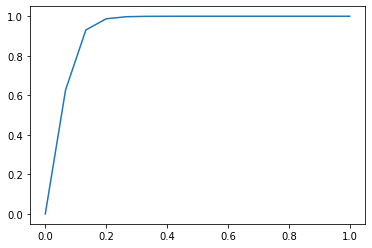

In [2]:
plt.plot(X,c1)

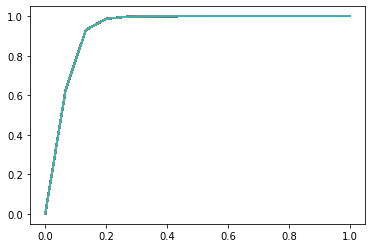

In [6]:
for i in range(nT-1):
  y=np.array(conc)
  plt.plot(X,y[i,:])

In [7]:
print(c1)

[0.         0.6275128  0.93062664 0.98707966 0.99759367 0.99955184
 0.99991653 0.99998445 0.9999971  0.99999946 0.9999999  0.99999998
 1.         1.         1.         1.        ]
